In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing

from statsmodels.tsa.api import Holt

from sklearn.metrics import mean_squared_error

In [14]:
df = pd.read_csv(r"C:\Kaustubh Vaibhav\Advance Analystics\Datasets\monthly-milk-production-pounds-p.csv")
df

,Month,Milk
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727
...,...,...
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797


<AxesSubplot: >

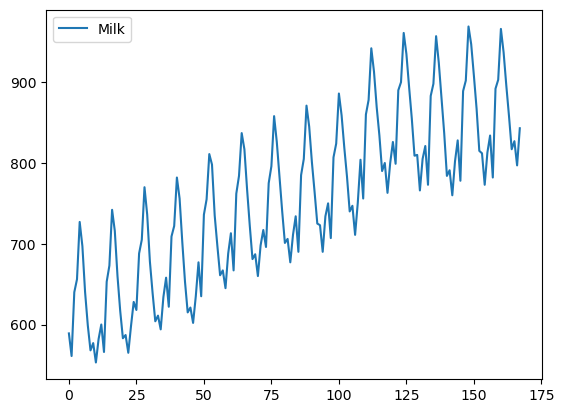

In [3]:
df.plot()

In [5]:
plt.show()

# additive

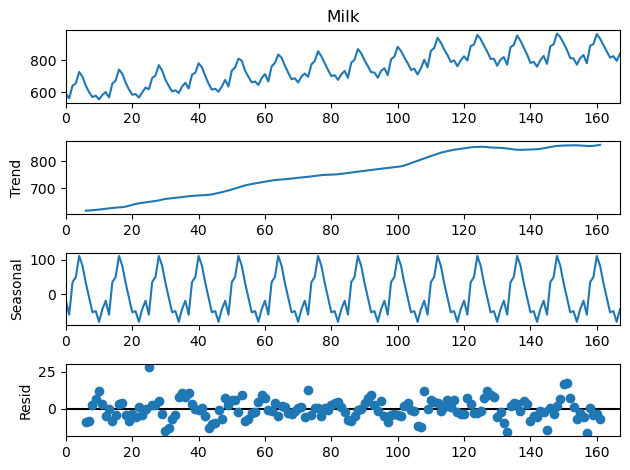

In [11]:
result = seasonal_decompose(df["Milk"], model = "additive", period = 12)
result.plot()
plt.show()

# multiplicative

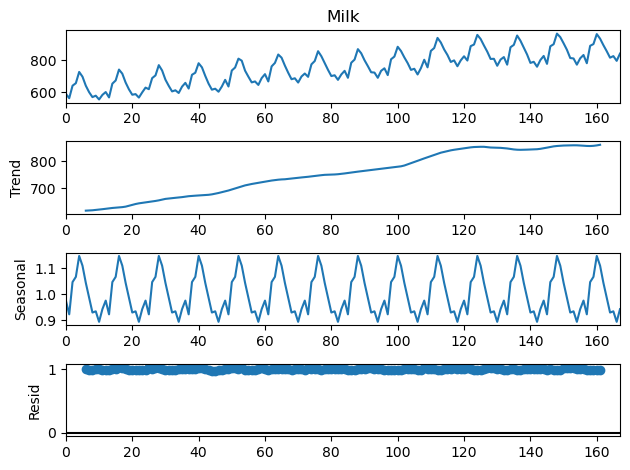

In [10]:
result = seasonal_decompose(df["Milk"], model = "multiplicative", period = 12)
result.plot()
plt.show()

### Partitioning of the data

In [13]:
y = df['Milk']
y_train = df['Milk'][:-12]
y_test = df['Milk'][-12:]

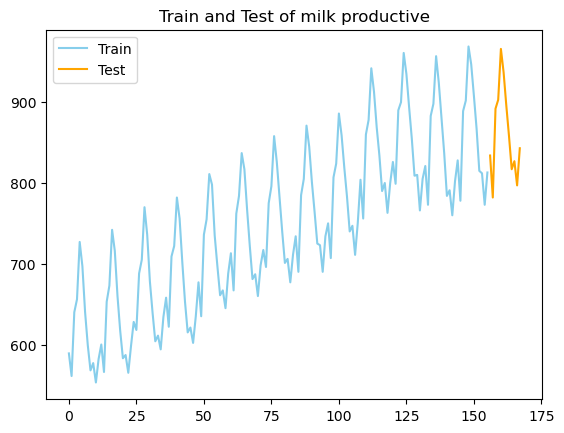

In [16]:
plt.plot(y_train, color = 'skyblue', label = 'Train')
plt.plot(y_test, color = 'orange', label = 'Test')
plt.legend(loc = 'best')
plt.title("Train and Test of milk productive")
plt.show()

## Centered moving average

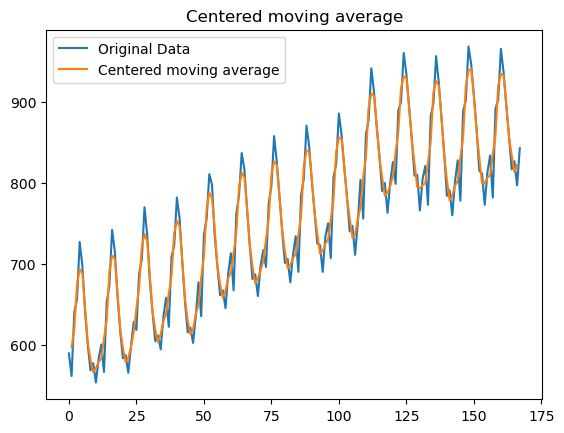

In [20]:
# here 3 shows the span 
fcast = y.rolling(3, center = True).mean()
plt.plot(y, label = 'Original Data')
plt.plot(fcast, label = 'Centered moving average')
plt.legend(loc = 'best')
plt.title("Centered moving average")
plt.show()

## Trailing moving average


from sklearn.metrics import mean_squared_error

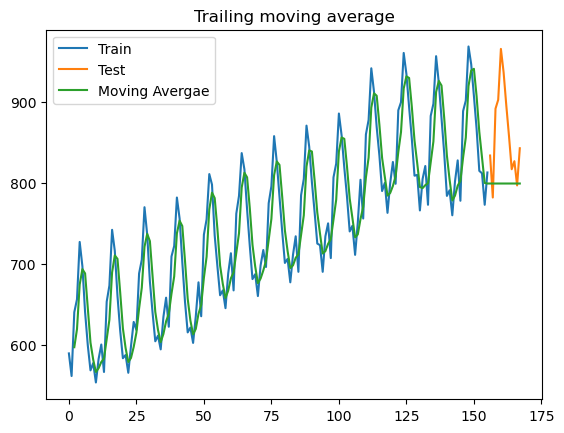

In [32]:
# span 3 is used
span = 3
fcast = y_train.rolling(span).mean()
last_val = fcast.iloc[-1]
MA_series = pd.Series(last_val.repeat(len(y_test)))
MA_fcast = pd.concat([fcast, MA_series], ignore_index = True)
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(MA_fcast, label = 'Moving Avergae')
plt.legend(loc = 'best')
plt.title("Trailing moving average")
plt.show()

## Evaluating for span = 3

In [27]:
rmse = np.sqrt(mean_squared_error(y_test, MA_series))
print("RMSE = ", rmse)

RMSE =  83.33766655400582


#### span 6 is used

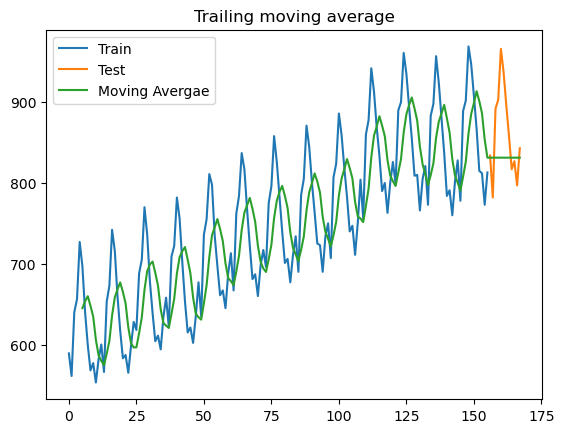

In [30]:
span = 6
fcast = y_train.rolling(span).mean()
last_val = fcast.iloc[-1]
MA_series = pd.Series(last_val.repeat(len(y_test)))
MA_fcast = pd.concat([fcast, MA_series], ignore_index = True)
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(MA_fcast, label = 'Moving Avergae')
plt.legend(loc = 'best')
plt.title("Trailing moving average")
plt.show()

### evaluating for span = 6

In [33]:
rmse = np.sqrt(mean_squared_error(y_test, MA_series))
print("RMSE = ", rmse)

RMSE =  83.33766655400582


## Simple Exponential Smoothing

from statsmodels.tsa.api import SimpleExpSmoothing

##### Alpha = 0.1 is used

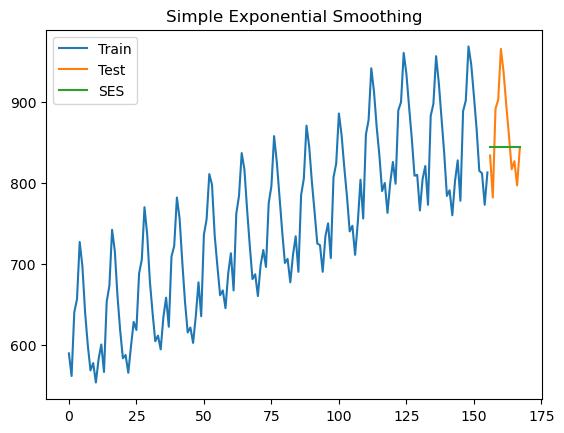

In [60]:
alpha = 0.1
fit1 = SimpleExpSmoothing(y_train).fit(smoothing_level = alpha)
fcast1 = fit1.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast1, label = 'SES')
plt.legend(loc = 'best')
plt.title("Simple Exponential Smoothing")
plt.show()

### Evaluating

In [61]:
# lower rmse is preferred, as it signifies the error

rmse = np.sqrt(mean_squared_error(y_test, fcast1))
print("RMSE = ", rmse)

RMSE =  57.02407689025325


#### Alpha = 0.2 is used

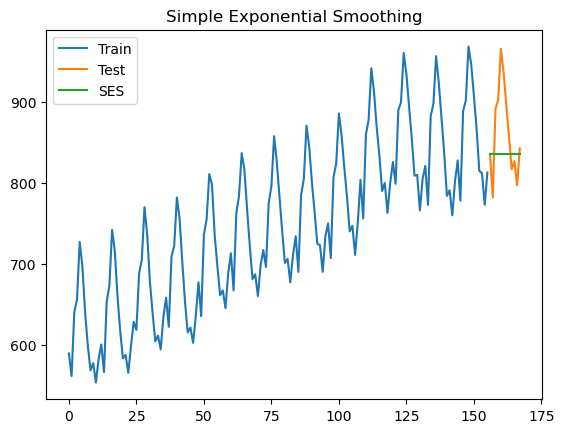

In [62]:
alpha = 0.2
fit1 = SimpleExpSmoothing(y_train).fit(smoothing_level = alpha)
fcast1 = fit1.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast1, label = 'SES')
plt.legend(loc = 'best')
plt.title("Simple Exponential Smoothing")
plt.show()

In [63]:
rmse = np.sqrt(mean_squared_error(y_test, fcast1))
print("RMSE = ", rmse)

RMSE =  60.41719003278307


##### Alpha = 0.3 is used

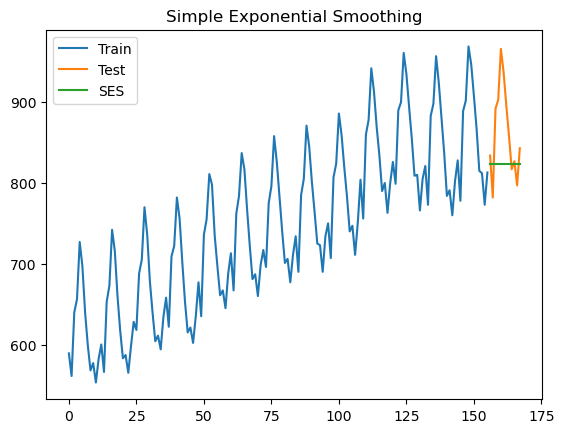

In [64]:
alpha = 0.3
fit1 = SimpleExpSmoothing(y_train).fit(smoothing_level = alpha)
fcast1 = fit1.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast1, label = 'SES')
plt.legend(loc = 'best')
plt.title("Simple Exponential Smoothing")
plt.show()

In [65]:
rmse = np.sqrt(mean_squared_error(y_test, fcast1))
print("RMSE = ", rmse)

RMSE =  66.49878205261881


## Holt's Linear Trend

from statsmodels.tsa.api import Holt

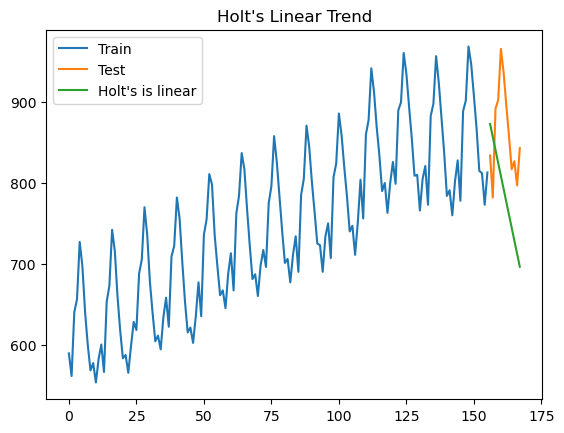

In [70]:
alpha = 0.1
beta = 0.9
fit2 = Holt(y_train).fit(smoothing_level = alpha,
                        smoothing_trend = beta)
fcast2 = fit2.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast2, label = "Holt's is linear")
plt.legend(loc = 'best')
plt.title("Holt's Linear Trend")
plt.show()


In [73]:
rmse = np.sqrt(mean_squared_error(y_test, fcast2))
print("RMSE = ", rmse)

RMSE =  103.61840119176892


## Holt's Exponential Trend

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


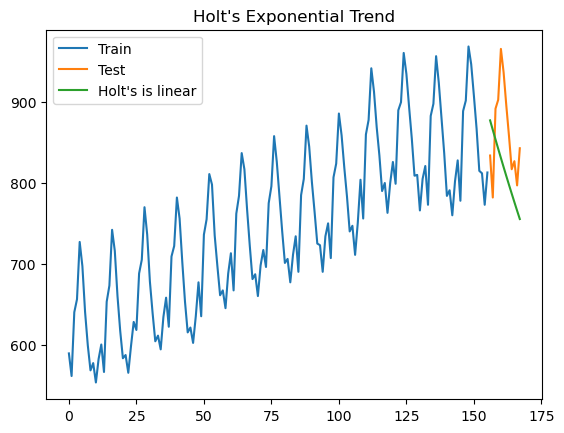

In [87]:
alpha = 0.1
beta = 0.8
fit2 = Holt(y_train, exponential = True).fit(smoothing_level = alpha,
                        smoothing_trend = beta)
fcast2 = fit2.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast2, label = "Holt's is linear")
plt.legend(loc = 'best')
plt.title("Holt's Exponential Trend")
plt.show()


In [88]:
rmse = np.sqrt(mean_squared_error(y_test, fcast2))
print("RMSE = ", rmse)


RMSE =  76.06631051647662


## Holt's Additive Trend

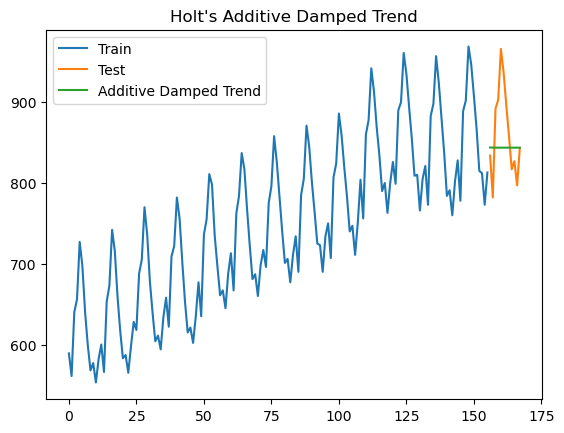

In [96]:
alpha=0.1
beta=0.8
phi=0.2
fit2 = Holt(y_train,damped_trend=True).fit(smoothing_level=alpha,
                         smoothing_trend=beta,
                         damping_trend=phi)
fcast2 = fit2.forecast(len(y_test))

plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(fcast2, label="Additive Damped Trend")
plt.legend(loc='best')
plt.title("Holt's Additive Damped Trend")
plt.show()

In [97]:
# Evaluating..
rmse = np.sqrt(mean_squared_error(y_test, fcast2))
print("RMSE = ", rmse)

RMSE =  57.38783232202011


## Holts Multiplicative Trend

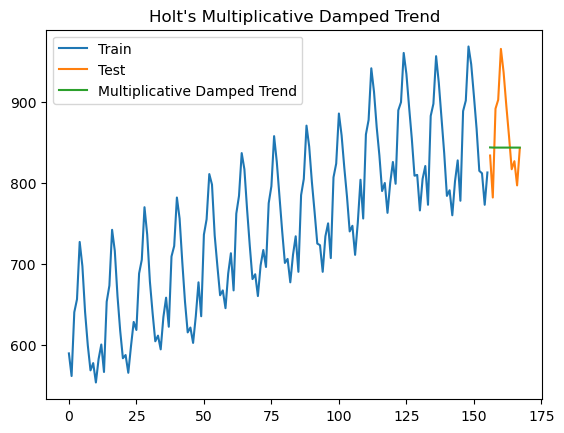

In [100]:
alpha=0.1
beta=0.8
phi=0.2
fit2 = Holt(y_train,damped_trend=True,exponential=True).fit(smoothing_level=alpha,
                         smoothing_trend=beta,
                         damping_trend=phi)
fcast2 = fit2.forecast(len(y_test))

plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(fcast2, label="Multiplicative Damped Trend")
plt.legend(loc='best')
plt.title("Holt's Multiplicative Damped Trend")
plt.show()


In [101]:
#### Evaluating
rmse = np.sqrt(mean_squared_error(y_test, fcast2))
print("RMSE =",rmse)

RMSE = 57.3626164203012


## Holt's- Winter Additive

from statsmodels.tsa.api import ExponentialSmoothing

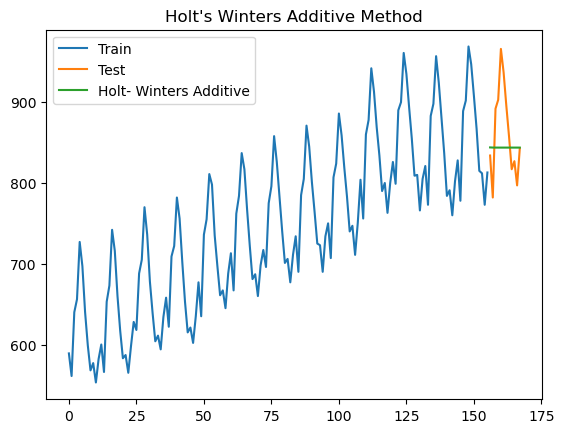

In [102]:
alpha = 0.1
beta = 0.8
gamma = 0.3
fit3 = ExponentialSmoothing(y_train, seasonal_periods = 12,
                           trend = 'add', seasonal = 'add').fit()
fcast3 = fit3.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast2, label = "Holt- Winters Additive")
plt.legend(loc = 'best')
plt.title("Holt's Winters Additive Method")
plt.show()

In [103]:
# Evaluating..
rmse = np.sqrt(mean_squared_error(y_test, fcast3))
print("RMSE = ", rmse)

RMSE =  11.932665837714705


## Damped Holt- Winters Multiplicative

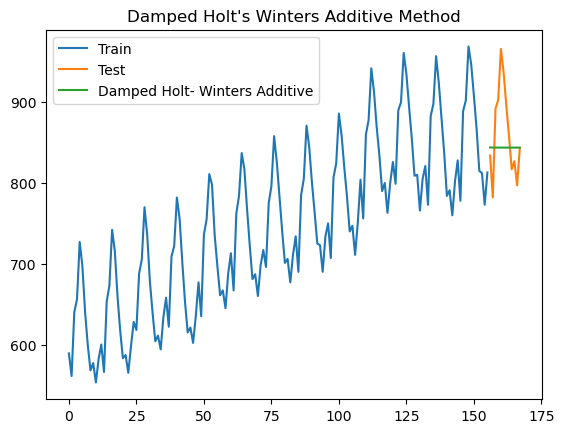

In [104]:
alpha = 0.1
beta = 0.8
gamma = 0.3
fit3 = ExponentialSmoothing(y_train, seasonal_periods = 12, damped_trend = True,
                           trend = 'add', seasonal = 'mul').fit()
fcast3 = fit3.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast2, label = "Damped Holt- Winters Additive")
plt.legend(loc = 'best')
plt.title("Damped Holt's Winters Additive Method")
plt.show()

In [105]:
# Evaluating..
rmse = np.sqrt(mean_squared_error(y_test, fcast3))
print("RMSE = ", rmse)

RMSE =  17.09919638835997
